In [1]:
%pip install flask-cors

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import numpy as np
import os
from keras.models import load_model
import time
import matplotlib.pyplot as plt

In [6]:
# Define the list of actions (update to match your dataset)
actions = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

5/5 [==============================] - 0s 72ms/step
Predicted action: H


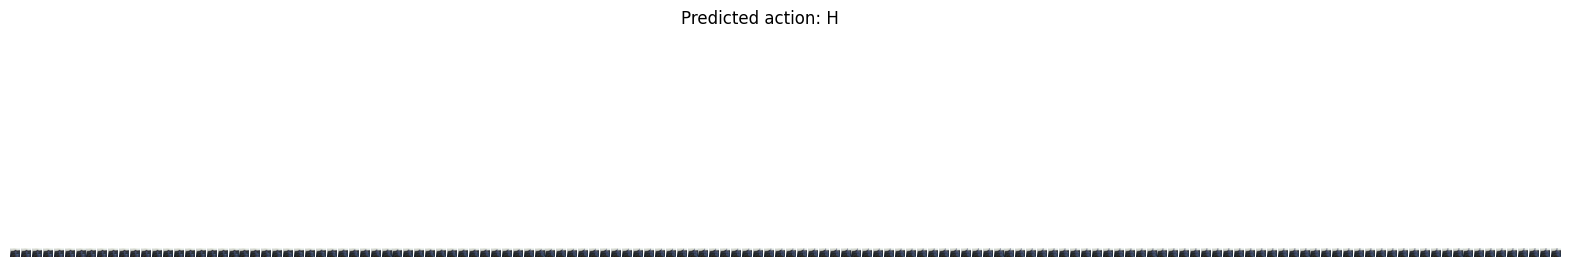

In [11]:
# Open the webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open video device.")
    exit()

frames = []
start_time = time.time()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
        break
    
    # Display the frame
    cv2.imshow('frame', frame)
    
    # Resize the frame to 112x112 pixels
    frame_resized = cv2.resize(frame, (112, 112))
    
    # Normalize pixel values
    frame_normalized = frame_resized / 255.0
    
    # Append the preprocessed frame to the list
    frames.append(frame_normalized)
    
    # Stop after 5 seconds
    if time.time() - start_time > 5:
        break

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

# Convert the frames to a numpy array
frames = np.array(frames)

# Check if frames were captured
if frames.size == 0:
    print("No frames were captured. Exiting.")
    exit()

# Reshape the data to fit the 3D CNN input requirement
frames = frames.reshape((frames.shape[0], 1, frames.shape[1], frames.shape[2], frames.shape[3]))

# Plot the recorded video frames before prediction
fig, axs = plt.subplots(1, len(frames), figsize=(20, 5))
for i in range(len(frames)):
    axs[i].imshow(frames[i][0])
    axs[i].axis('off')
plt.show()

# Make predictions
predictions = detection.predict(frames)

# Get the most likely action
predicted_label = np.argmax(np.mean(predictions, axis=0))  # Use mean to aggregate predictions over frames

# Print the predicted action
print("Predicted action:", actions[predicted_label])

# Plot the recorded video frames after prediction
fig, axs = plt.subplots(1, len(frames), figsize=(20, 5))
for i in range(len(frames)):
    axs[i].imshow(frames[i][0])
    axs[i].axis('off')
fig.suptitle(f'Predicted action: {actions[predicted_label]}')
plt.show()

1/1 [==============================] - 0s 63ms/step
Predicted action: A


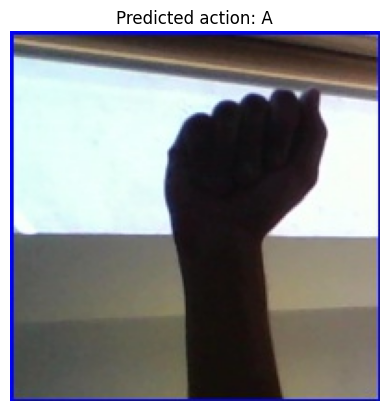

In [15]:
# Define the list of actions (update to match your dataset)
actions = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


def preprocess_image(image_path):
    # Load the image
    frame = cv2.imread(image_path)
    if frame is None:
        raise FileNotFoundError(f"Image file not found or unable to open: {image_path}")
    
    # Resize the image to 112x112 pixels
    frame_resized = cv2.resize(frame, (112, 112))
    
    # Normalize pixel values
    frame_normalized = frame_resized / 255.0
    
    # Add an extra dimension for the batch size (1,)
    frame_normalized = np.expand_dims(frame_normalized, axis=0)
    
    # Add a dimension for frames (1, height, width, channels)
    frame_normalized = np.expand_dims(frame_normalized, axis=1)
    
    return frame_normalized

def predict_action(image_path):
    # Pre-process the image
    preprocessed_frame = preprocess_image(image_path)
    
    # Make a prediction
    predictions = detection.predict(preprocessed_frame)
    
    # Get the most likely action
    predicted_label = np.argmax(np.mean(predictions, axis=0))
    
    return predicted_label

# Example usage
image_path = r'D:\app\A_test.jpg'  # Update to the path of your image
try:
    predicted_label = predict_action(image_path)
    print("Predicted action:", actions[predicted_label])
    
    # Display the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'Predicted action: {actions[predicted_label]}')
    plt.show()

except Exception as e:
    print(f"Error during prediction: {e}")

1/1 [==============================] - 0s 54ms/step
Predicted action: B


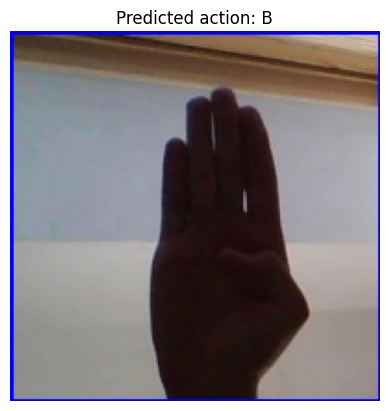

In [17]:
# Define the list of actions (update to match your dataset)
actions = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


def preprocess_image(image_path):
    # Load the image
    frame = cv2.imread(image_path)
    if frame is None:
        raise FileNotFoundError(f"Image file not found or unable to open: {image_path}")
    
    # Resize the image to 112x112 pixels
    frame_resized = cv2.resize(frame, (112, 112))
    
    # Normalize pixel values
    frame_normalized = frame_resized / 255.0
    
    # Add an extra dimension for the batch size (1,)
    frame_normalized = np.expand_dims(frame_normalized, axis=0)
    
    # Add a dimension for frames (1, height, width, channels)
    frame_normalized = np.expand_dims(frame_normalized, axis=1)
    
    return frame_normalized

def predict_action(image_path):
    # Pre-process the image
    preprocessed_frame = preprocess_image(image_path)
    
    # Make a prediction
    predictions = detection.predict(preprocessed_frame)
    
    # Get the most likely action
    predicted_label = np.argmax(np.mean(predictions, axis=0))
    
    return predicted_label

# Example usage
image_path = r'D:\app\B_test.jpg'  # Update to the path of your image
try:
    predicted_label = predict_action(image_path)
    print("Predicted action:", actions[predicted_label])
    
    # Display the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'Predicted action: {actions[predicted_label]}')
    plt.show()

except Exception as e:
    print(f"Error during prediction: {e}")